# Weather prediction through image using Convolutional Neural Network and SVM as Final Layer

In [1]:
#import all necessary libraries required
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
path = 'C:\\Users\\User\\Downloads\\weatherdata.xlsx'
df = pd.read_excel(path)
df.head()

,image,label
0,C:\Users\User\Downloads\Weather\cloudy\cloudy1...,cloudy
1,C:\Users\User\Downloads\Weather\cloudy\cloudy2...,cloudy
2,C:\Users\User\Downloads\Weather\cloudy\cloudy3...,cloudy
3,C:\Users\User\Downloads\Weather\cloudy\cloudy4...,cloudy
4,C:\Users\User\Downloads\Weather\cloudy\cloudy5...,cloudy


In [2]:
# counting number of train and test images present of each category
import os
img_folder = ['cloudy','shine','sunrise','rainy']
trn_imgs = {}
tst_imgs = {}
for i in img_folder:
    nimages = len(os.listdir('C:\\Users\\User\\Downloads\\Weather\\traindata\\'+ i + '\\'))
    trn_imgs[i] = nimages
for i in img_folder:
    nimages = len(os.listdir('C:\\Users\\User\\Downloads\\Weather\\testdata\\'+ i + '\\'))
    tst_imgs[i] = nimages

print("Total number of multiclass images in train data are:-\n" + str(trn_imgs))
print("\nTotal number of multiclass images in test data are:-\n" + str(tst_imgs))

Total number of multiclass images in train data are:-
{'cloudy': 240, 'shine': 203, 'sunrise': 285, 'rainy': 172}

Total number of multiclass images in test data are:-
{'cloudy': 60, 'shine': 52, 'sunrise': 96, 'rainy': 19}


## Data visualisation

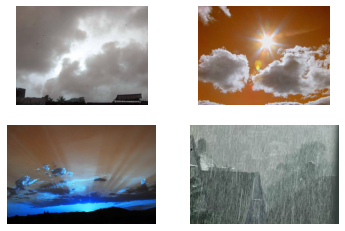

In [3]:
# creating subplot to view all type of categorical images 
imglist = ['\\cloudy4.jpg','\\shine4.jpg','\\sunrise4.jpg','\\rain4.jpg']
for i in range(4):
    img_path = cv2.imread('C:\\Users\\User\\Downloads\\Weather\\randomimg'+imglist[i])
    plt.axis("off")
    plt.subplot(2,2,i+1)
    plt.axis("off")
    plt.imshow(img_path)

In [4]:
df.shape

(1125, 2)

([<matplotlib.patches.Wedge at 0x1d0636d55b0>,
 [Text(0.5971694464475223, 0.9237903724490529, 'rainy'),
  Text(-1.0475768639823622, 0.3355334767931212, 'shine'),
  Text(-0.36320327103383226, -1.0383079427175375, 'cloudy'),
  Text(0.9076249518058371, -0.6214635523177945, 'sunrise')],
 [Text(0.32572878897137575, 0.5038856576994833, '31.73'),
  Text(-0.5714055621721974, 0.18301826006897517, '26.67'),
  Text(-0.19811087510936304, -0.5663497869368385, '22.49'),
  Text(0.4950681555304566, -0.33898011944606965, '19.11')])

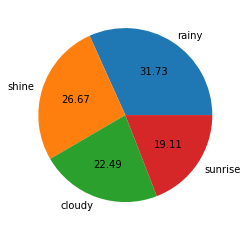

In [5]:
# creating a pie-chart to see the percentage of each category present in the dataset
label = ['rainy', 'shine', 'cloudy', 'sunrise']
plt.pie(df['label'].value_counts(),labels=label,autopct='%.2f')

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#data preprocessing & data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('C:\\Users\\User\\Downloads\\Weather\\traindata',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:\\Users\\User\\Downloads\\Weather\\testdata',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 899 images belonging to 4 classes.
Found 226 images belonging to 4 classes.


## Building CNN

In [7]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# #Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

## Output layer
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='softmax'))

In [8]:
#Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 5

In [10]:
# training the CNN on the Training set and evaluating it on the Test set
train = cnn.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5
29/29 [==============================] - 13s 456ms/step - loss: 1.2006 - accuracy: 0.5873 - val_loss: 1.0632 - val_accuracy: 0.7478
Epoch 2/5
29/29 [==============================] - 11s 383ms/step - loss: 1.0968 - accuracy: 0.7086 - val_loss: 1.0453 - val_accuracy: 0.7522
Epoch 3/5
29/29 [==============================] - 11s 396ms/step - loss: 1.0642 - accuracy: 0.7152 - val_loss: 1.0090 - val_accuracy: 0.8009
Epoch 4/5
29/29 [==============================] - 11s 391ms/step - loss: 0.9862 - accuracy: 0.8131 - val_loss: 0.9907 - val_accuracy: 0.7832
Epoch 5/5
29/29 [==============================] - 12s 397ms/step - loss: 0.9490 - accuracy: 0.8331 - val_loss: 0.9640 - val_accuracy: 0.8097


## Evaluating Model

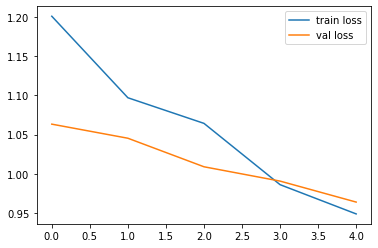

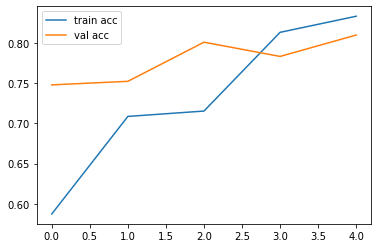

In [11]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(train.history['loss'], label='train loss')
plt.plot(train.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(train.history['accuracy'], label='train acc')
plt.plot(train.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [12]:
# Save it as h5 file
cnn.save('weather.h5')

from tensorflow.keras.models import load_model
# load model
model = load_model('weather.h5')

## Predicting on unseen data 

In [42]:
from tensorflow.keras.preprocessing import image

pred_image = image.load_img('C:\\Users\\User\\Downloads\\Weather\\testdata\\rain174.jpg', target_size = (64,64))
pred_image = image.img_to_array(pred_image)
pred_image = pred_image/255
pred_image = np.expand_dims(pred_image, axis = 0)
result = cnn.predict(pred_image)

In [43]:
answer = np.argmax(result,axis=1)

In [44]:
if answer == 0:
    print("The given weather image is classified as cloudy")
elif answer == 1:
    print("The given weather image is classified as rainy")
elif answer == 2:
    print("The given weather image is classified as sunshine")
elif answer == 3:
    print("The given weather image is classified as sunrise")

The given weather image is classified as rainy
